# Data Preprocessing

In [2]:
# This script suppresses all warning messages.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# This code sets the width of the Jupyter notebook container to 70% of the window width.
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
df = pd.read_csv("../diabetes.csv") 

## Examining the Dataset

In [6]:
# Display the first few rows of the dataset
df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
columns_with_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count and print the number of zero values in each specified column
for col in columns_with_zeroes:
    print(f"Number of rows with zero value in the {col} column {(df[col] == 0).sum()}")

Number of rows with zero value in the Glucose column 5
Number of rows with zero value in the BloodPressure column 35
Number of rows with zero value in the SkinThickness column 227
Number of rows with zero value in the Insulin column 374
Number of rows with zero value in the BMI column 11


In [8]:
# Replace zero values with NaN in specified columns
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

In [9]:
# Check for NaN values in the dataset
nan_exists_all = df.isna().any()
print(nan_exists_all)

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [10]:
# Calculate and display the percentage of non-missing values in each column
occupancy_rate = df.notna().mean() * 100
occupancy_rate

Pregnancies                 100.000000
Glucose                      99.348958
BloodPressure                95.442708
SkinThickness                70.442708
Insulin                      51.302083
BMI                          98.567708
DiabetesPedigreeFunction    100.000000
Age                         100.000000
Outcome                     100.000000
dtype: float64

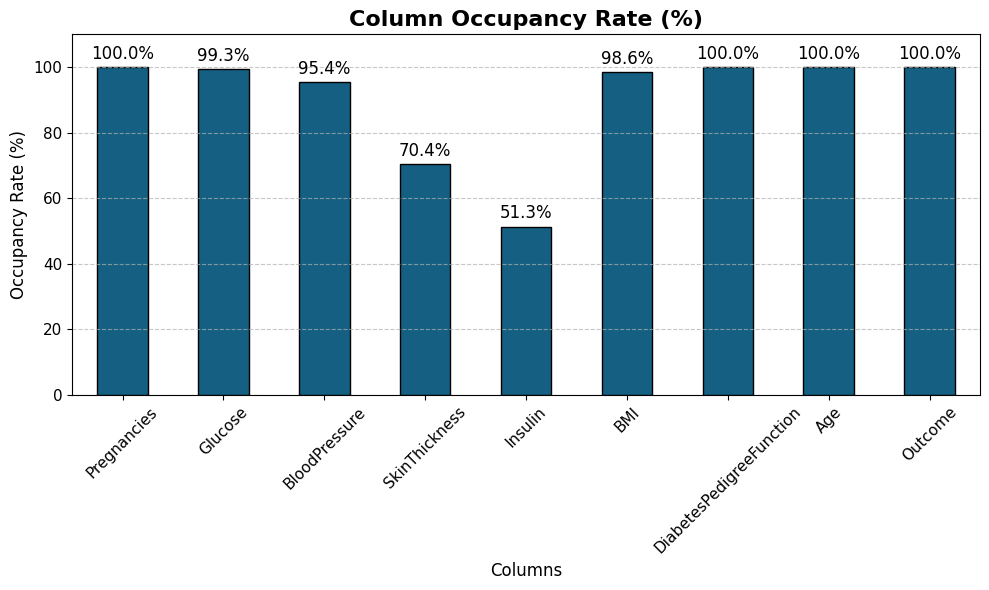

In [11]:
# Visualize the occupancy rates
plt.figure(figsize=(10, 6))
ax = occupancy_rate.plot(kind='bar', color='#156082', edgecolor='black')

plt.title('Column Occupancy Rate (%)', fontsize=16, fontweight='bold')
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12, fmt='%.1f%%')

plt.ylim(0, 110)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Calculate and print the count of non-missing values in each column
occupancy_rate = df.notna().sum()
print(occupancy_rate)

Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


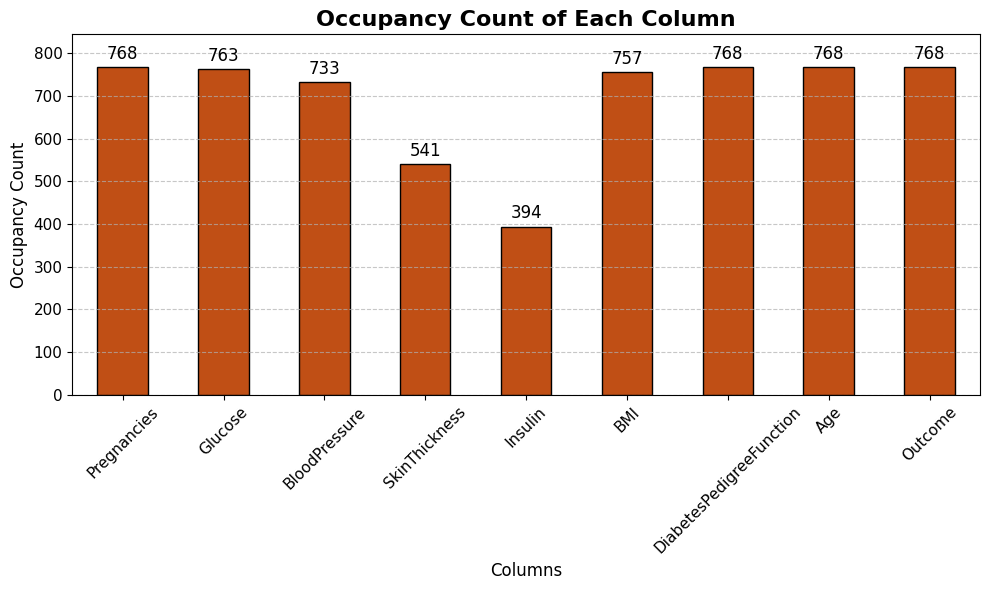

In [13]:
# Visualize the count of non-missing values
plt.figure(figsize=(10, 6))
ax = occupancy_rate.plot(kind='bar', color='#C04F15', edgecolor='black')

plt.title('Occupancy Count of Each Column', fontsize=16, fontweight='bold')
plt.ylabel('Occupancy Count', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12)

plt.ylim(0, occupancy_rate.max() * 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Calculate and print the mode (most frequent) value for each column, excluding zeros
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Calculate and print the mode for each specified column
for col in columns_with_zeros:
    mod_value = df[df[col] != 0][col].mode()[0]
    print(f"Moderate (most frequent) value of the {col} column: {mod_value}")


Moderate (most frequent) value of the Glucose column: 99.0
Moderate (most frequent) value of the BloodPressure column: 70.0
Moderate (most frequent) value of the SkinThickness column: 32.0
Moderate (most frequent) value of the Insulin column: 105.0
Moderate (most frequent) value of the BMI column: 32.0


## Filling Blank Values With Random Forest

In [15]:
# Import necessary libraries for regression imputation
from sklearn.ensemble import RandomForestRegressor

In [16]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for target_col in columns_with_zeros:

    feature_cols = [col for col in df.columns if col != target_col]

    df_temp = df.copy()

    # Fill zeros in other columns with their mode values
    for col in columns_with_zeros:
        if col != target_col:
            mod_value = df_temp[df_temp[col] != 0][col].mode()[0]
            df_temp[col] = df_temp[col].replace(0, mod_value)

    df_temp = df_temp.fillna(0)

    # 🔥 NaN satırlarını bul
    nan_rows_index = df[df[target_col].isna()].index

    train_data = df_temp[df[target_col].notna()]
    predict_data = df_temp.loc[nan_rows_index, feature_cols]

    if len(predict_data) == 0:
        print(f"No missing NaN values found in {target_col}.")
        continue

    X_train = train_data[feature_cols]
    y_train = train_data[target_col]

    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(predict_data)
    df.loc[nan_rows_index, target_col] = predictions

    print(f"Filled missing NaN values in {target_col}.")


Filled missing NaN values in Glucose.
Filled missing NaN values in BloodPressure.
Filled missing NaN values in SkinThickness.
Filled missing NaN values in Insulin.
Filled missing NaN values in BMI.


In [17]:
# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0         35.000  180.385  33.6   
1            1     85.0           66.0         29.000   53.720  26.6   
2            8    183.0           64.0         19.665  250.925  23.3   
3            1     89.0           66.0         23.000   94.000  28.1   
4            0    137.0           40.0         35.000  168.000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [18]:
# Check for NaN values in the dataset
nan_exists_all = df.isna().any()
print(nan_exists_all)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [19]:
# Calculate and display the percentage of non-missing values in each column
occupancy_rate = df.notna().mean() * 100
occupancy_rate

Pregnancies                 100.0
Glucose                     100.0
BloodPressure               100.0
SkinThickness               100.0
Insulin                     100.0
BMI                         100.0
DiabetesPedigreeFunction    100.0
Age                         100.0
Outcome                     100.0
dtype: float64

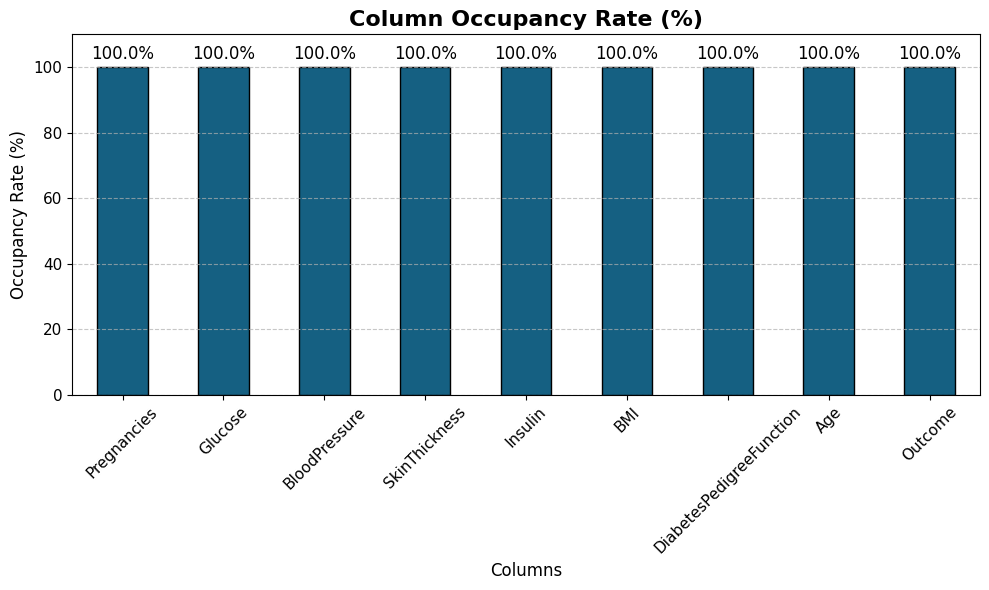

In [20]:
# Visualize the updated occupancy rates
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
ax = occupancy_rate.plot(kind='bar', color='#156082', edgecolor='black')

plt.title('Column Occupancy Rate (%)', fontsize=16, fontweight='bold')
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12, fmt='%.1f%%')

plt.ylim(0, 110)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Check data types
print("Data Types:")
print(df.dtypes)

# Check for NaN values in the dataset
nan_exists_all = df.isna().any()
print("\nCheck for NaN values in the dataset:")
print(nan_exists_all)

Data Types:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Check for NaN values in the dataset:
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


## Outlier Detection

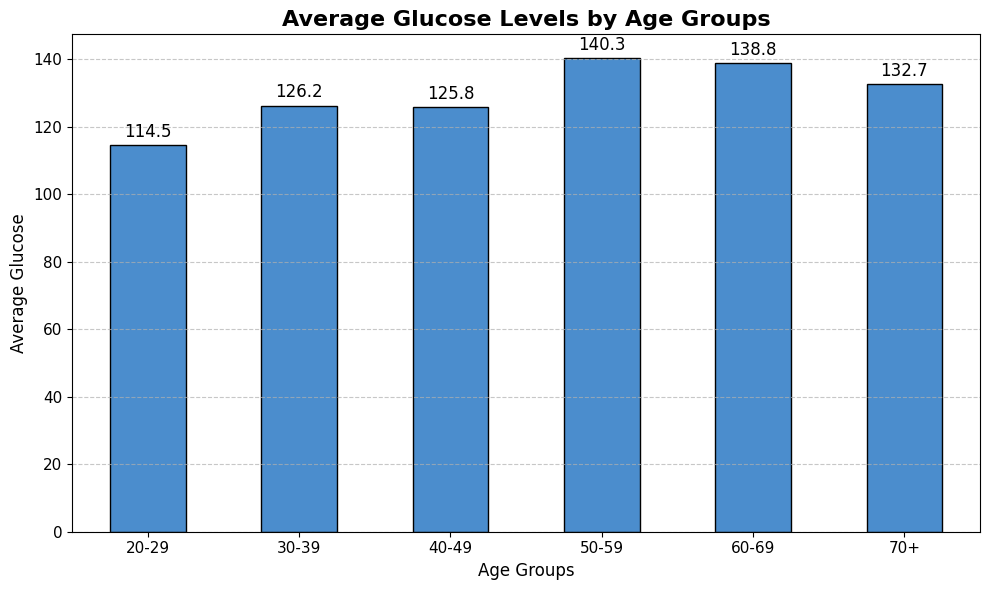

In [22]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average glucose levels by age group
glucose_by_age_group = df.groupby('Age_Group', observed=False)['Glucose'].mean()

# Bar graph
plt.figure(figsize=(10, 6))
ax = glucose_by_age_group.plot(kind='bar', color='#4B8DCD', edgecolor='black')

plt.title('Average Glucose Levels by Age Groups', fontsize=16, fontweight='bold')
plt.ylabel('Average Glucose', fontsize=12)
plt.xlabel('Age Groups', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12, fmt='%.1f')

plt.tight_layout()
plt.show()


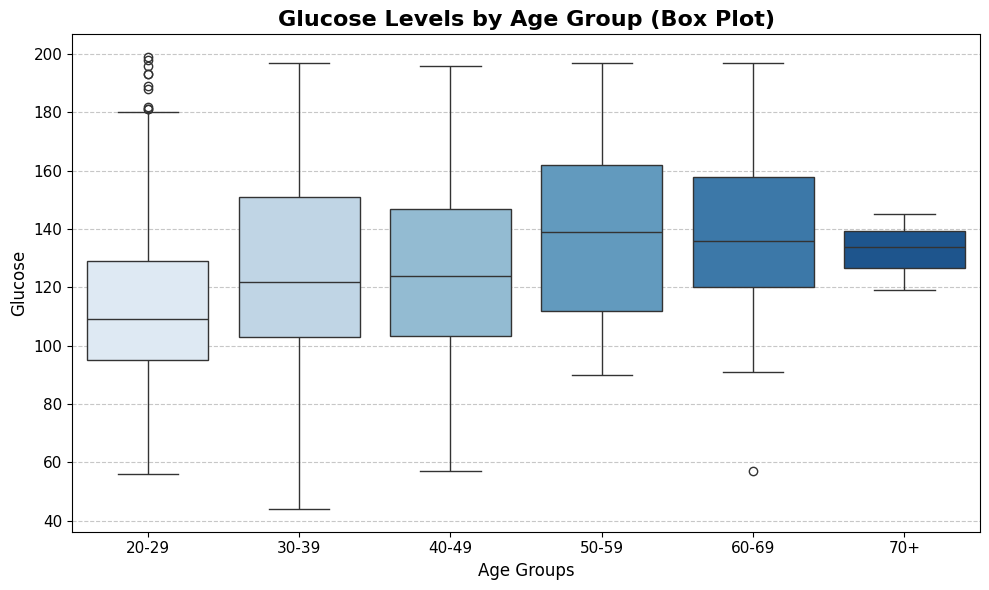

In [23]:
# Visualize glucose levels by age group using a box plot
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Glucose', palette='Blues')

plt.title('Glucose Levels by Age Group (Box Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Glucose', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Outlier Count (Insulin): 19


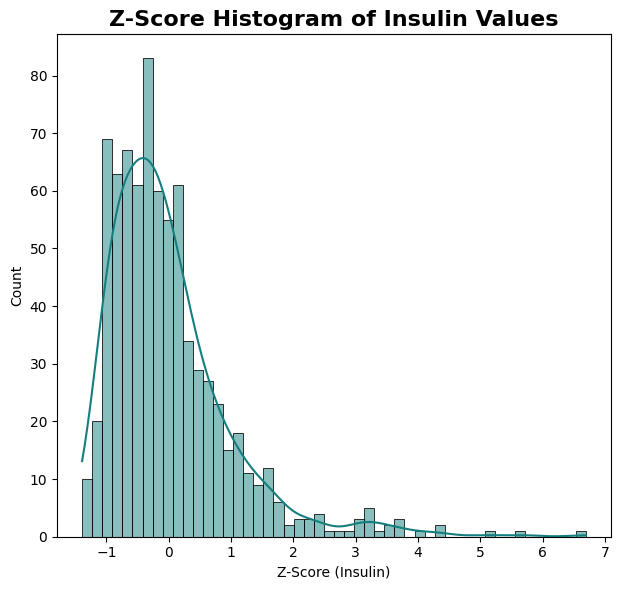

In [24]:
from scipy.stats import zscore

# Outlier Analysis (Using Z-score)
df['z_score_insulin'] = zscore(df['Insulin'])

# Select outliers (|Z| > 3)
outliers_insulin = df[df['z_score_insulin'].abs() > 3]

# Print the count of outliers
print(f"Outlier Count (Insulin): {outliers_insulin.shape[0]}")



# Visualize the Z-score distribution for Insulin values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(df['z_score_insulin'], bins=50, color='#157F7F', kde=True)
plt.title('Z-Score Histogram of Insulin Values', fontsize=16, fontweight='bold')
plt.xlabel('Z-Score (Insulin)')
plt.tight_layout()
plt.show()



In [25]:
# Print the first 100 rows of outliers for Insulin
print("Outlier Rows (First 100) for Insulin:")
print(outliers_insulin[['Insulin', 'z_score_insulin']].head(100))

Outlier Rows (First 100) for Insulin:
     Insulin  z_score_insulin
8     543.00         3.749723
13    846.00         6.694401
111   495.00         3.283239
153   485.00         3.186055
186   495.00         3.283239
220   478.00         3.118026
228   744.00         5.703123
247   680.00         5.081145
286   545.00         3.769160
319   518.07         3.507443
409   579.00         4.099586
415   474.00         3.079153
486   480.00         3.137463
579   605.84         4.360428
584   600.00         4.303672
655   540.00         3.720568
695   480.00         3.137463
753   510.00         3.429015
759   517.30         3.499960


Size of cleaned dataset (Insulin): 749


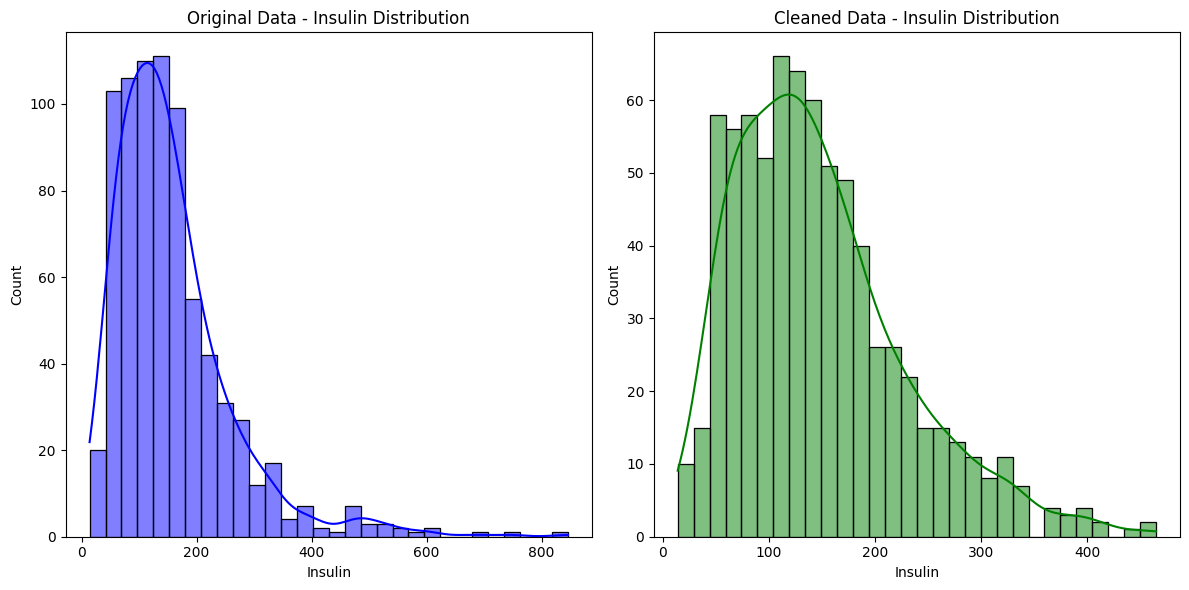

In [26]:
# Remove outliers based on Z-score
df_insulin_cleaned = df[df['z_score_insulin'].abs() <= 3]

# Size of cleaned dataset
print(f"Size of cleaned dataset (Insulin): {df_insulin_cleaned.shape[0]}")

# Visualize original vs cleaned data histograms
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Insulin'], kde=True, color='blue', bins=30)
plt.title('Original Data - Insulin Distribution')
plt.xlabel('Insulin')

# Cleaned data histogram
plt.subplot(1, 2, 2)
sns.histplot(df_insulin_cleaned['Insulin'], kde=True, color='green', bins=30)
plt.title('Cleaned Data - Insulin Distribution')
plt.xlabel('Insulin')

plt.tight_layout()
plt.show()


In [27]:
# Min-Max Normalization (Insulin)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_insulin_cleaned = df_insulin_cleaned.assign(
    Insulin_normalized = scaler.fit_transform(df_insulin_cleaned[['Insulin']])
)

# Display the first and last 10 rows of the normalized Insulin values
print("First 10 Rows:")
print(df_insulin_cleaned[['Insulin', 'Insulin_normalized']].head(10))

print("\nLast 10 Rows:")
print(df_insulin_cleaned[['Insulin', 'Insulin_normalized']].tail(10))


First 10 Rows:
    Insulin  Insulin_normalized
0   180.385            0.368925
1    53.720            0.088071
2   250.925            0.525333
3    94.000            0.177384
4   168.000            0.341463
5   115.350            0.224723
6    88.000            0.164080
7   160.995            0.325931
9   269.390            0.566275
10  141.160            0.281951

Last 10 Rows:
     Insulin  Insulin_normalized
757  267.680            0.562483
758  135.485            0.269368
760   16.000            0.004435
761  230.820            0.480754
762   57.640            0.096763
763  180.000            0.368071
764  178.145            0.363958
765  112.000            0.217295
766  151.225            0.304268
767   67.980            0.119690


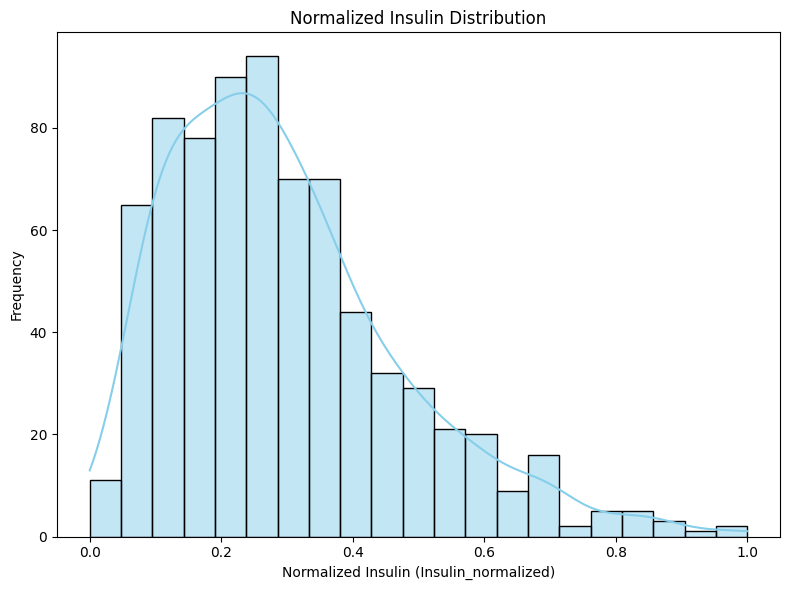

In [28]:
# Visualize the distribution of normalized Insulin values
plt.figure(figsize=(8, 6))
sns.histplot(df_insulin_cleaned['Insulin_normalized'], kde=True, color='skyblue')
plt.title('Normalized Insulin Distribution')
plt.xlabel('Normalized Insulin (Insulin_normalized)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Save New Data

In [29]:
## Save New Data
df_insulin_cleaned.to_csv("../diabetes_preprocessed.csv", index=False)